# Data Exploration

In [64]:
'''
Import required packages and libraries for data exploration
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
'''
Set up file path and data handling objects
'''
PATH = "../data/reviews.csv"
data = pd.read_csv(PATH)

## Basic Data Exploration
- How many data points are there?
- What is the structure of the data?
- What is the distribution of target variables?

In [4]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
data.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


## Advanced Data Exploration

### Types of Food Reviews
Look at the distribution of food reviews:
- What types of food are most commonly reviewed?
- What is their average score, helpfulness, etc.?

### Unique Food Products
Look at the frequency of unique food products (ProductId):
- How many unique products are there?
- Which products have the most reviews?
- What is the average score/helpfulness of these reviews?

In [6]:
# Distribution of reviews across each unique product
prod_map = {}

for id in data["ProductId"]:
    if id in prod_map.keys():
        prod_map[id] += 1
    else:
        prod_map[id] = 1

len(prod_map)

74258

In [56]:
# Top 10 products with the most reviews
prod_count = pd.DataFrame(list(prod_map.items()), columns=['ProductId', 'Count'])
top_prod   = prod_count.sort_values("Count", ascending=0).head(10)

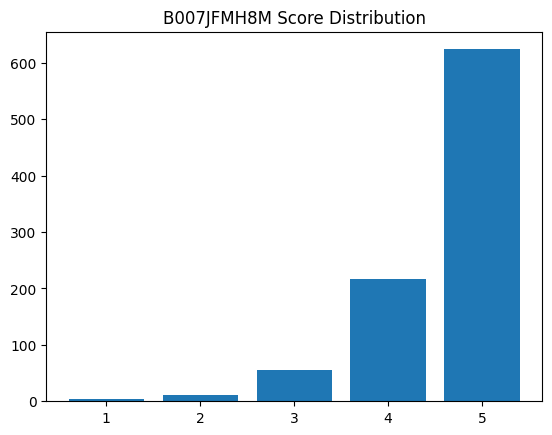

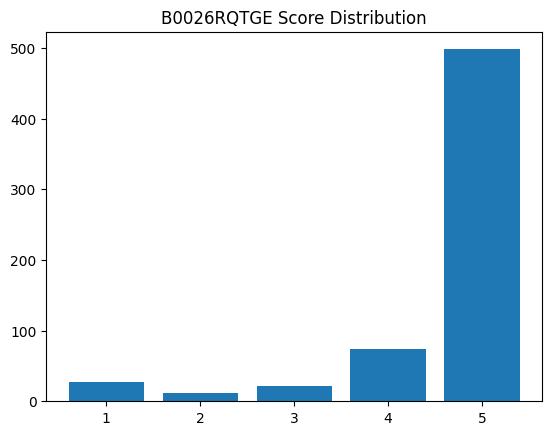

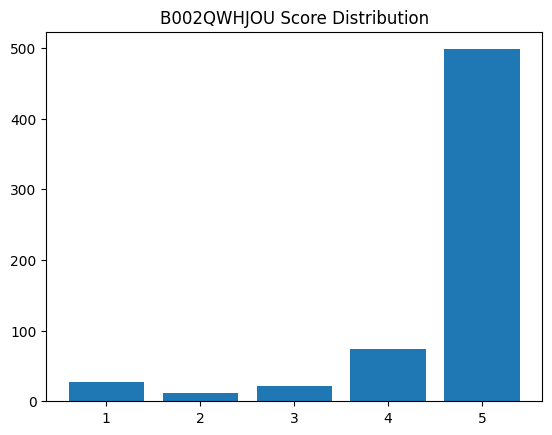

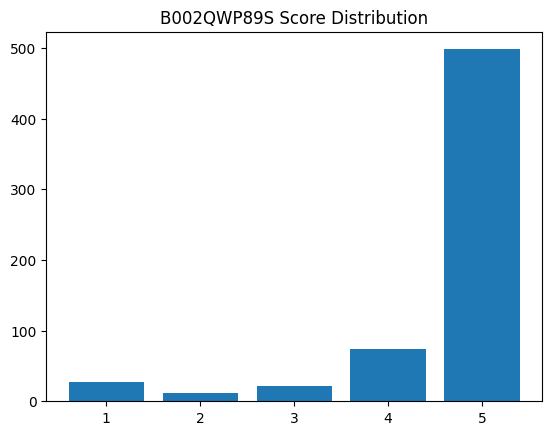

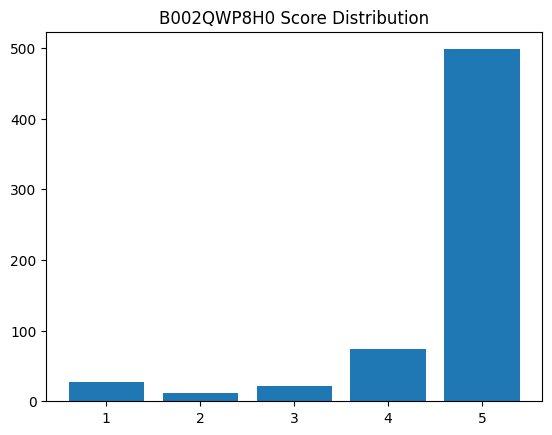

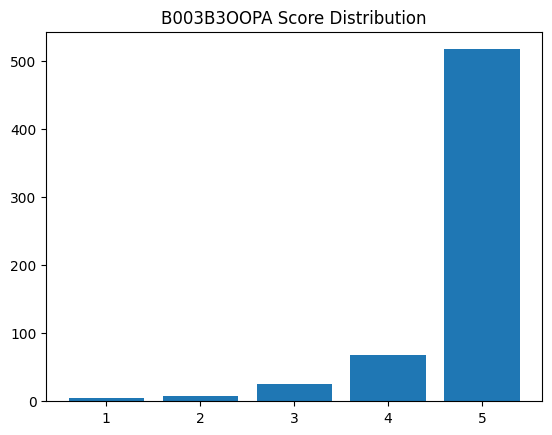

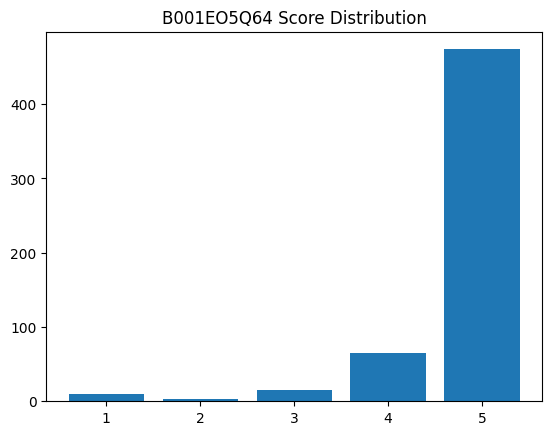

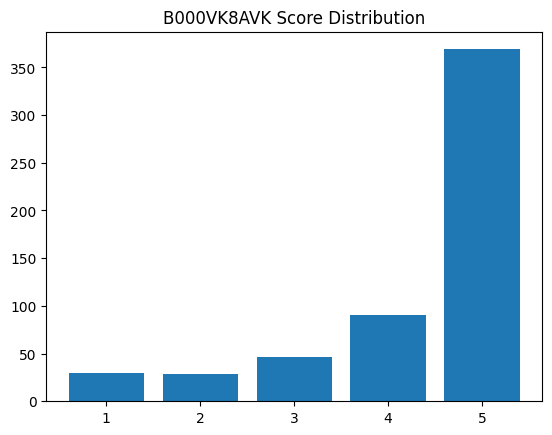

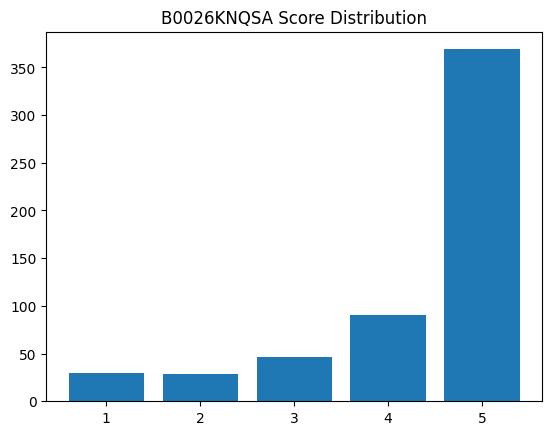

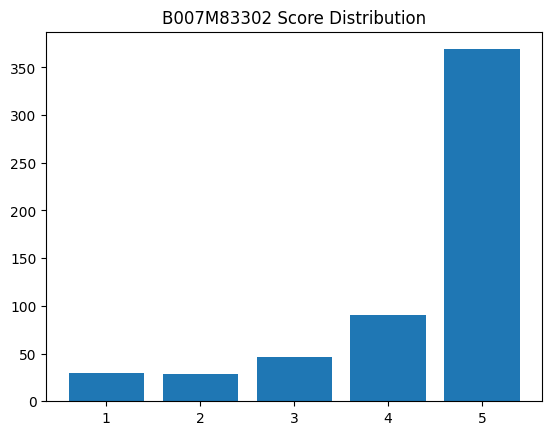

In [80]:
# Plot each of the products and the distribution of their scores
for prod in top_prod["ProductId"]:
    scores = data[data["ProductId"]==prod]["Score"].value_counts().sort_index().reset_index()
    scores.columns = ["Score", "Count"]
    
    plt.title(f"{prod} Score Distribution")
    plt.bar(scores["Score"], scores["Count"])
    plt.show()

In [81]:
help_df = pd.DataFrame(columns=["ProductId", "Helpfulness"])

for prod in top_prod["ProductId"]:
    # Filter product rows
    prod_data = data[data["ProductId"]==prod]

    # Calculate the helpfulness
    helpfulness_scores = prod_data["HelpfulnessNumerator"]/prod_data["HelpfulnessDenominator"].replace(0,np.nan)

    # Temporary dataframe to store calculation
    temp_df = pd.DataFrame({"ProductId":prod, "Helpfulness":helpfulness_scores})

    # Append to master dataframe
    help_df = pd.concat([help_df, temp_df], ignore_index=True)

C:\Users\cyrus\AppData\Local\Temp\ipykernel_3492\3815166573.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  help_df = pd.concat([help_df, temp_df], ignore_index=True)


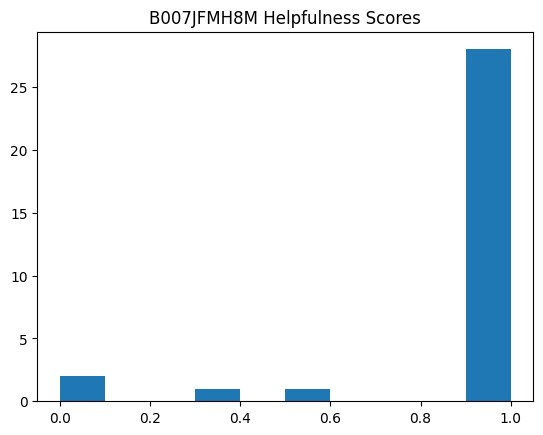

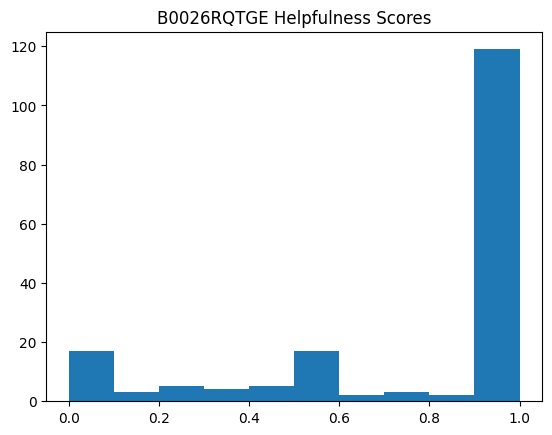

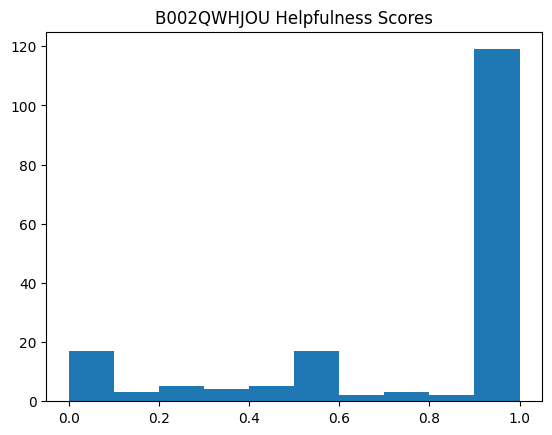

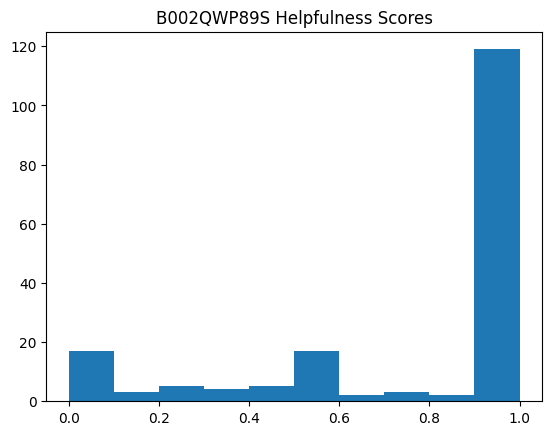

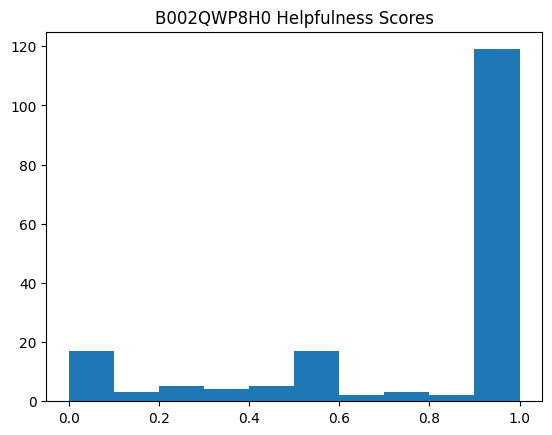

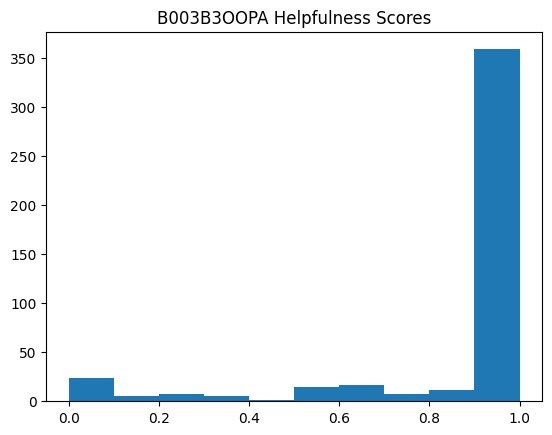

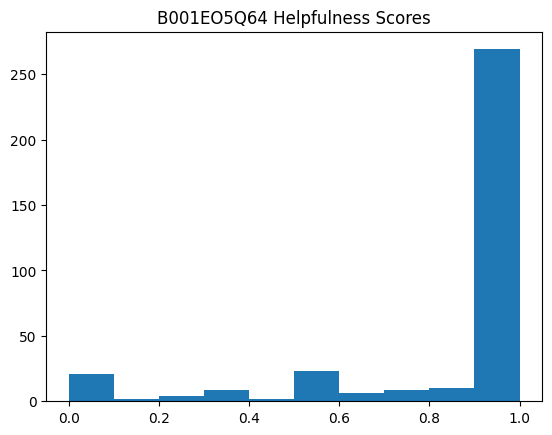

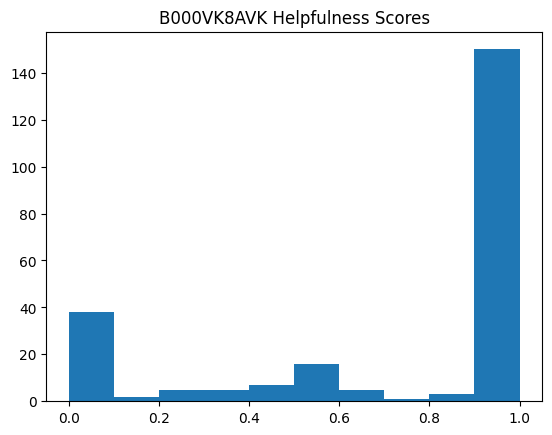

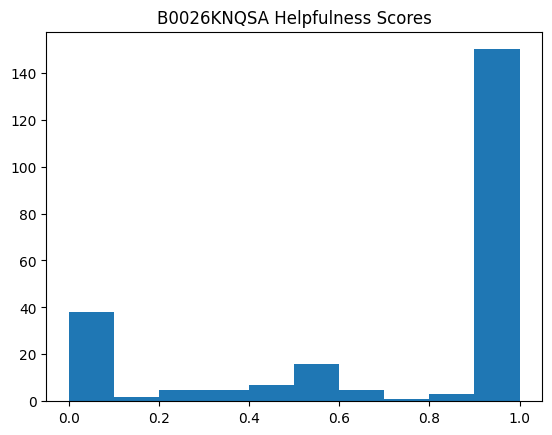

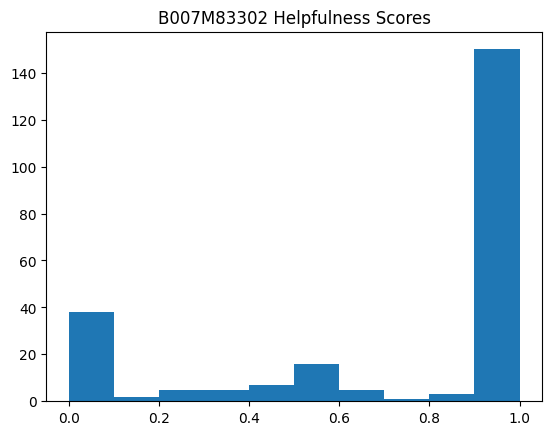

In [82]:
for prod in top_prod["ProductId"]:
    plt.title(f"{prod} Helpfulness Scores")
    plt.hist(help_df[help_df["ProductId"]==prod]["Helpfulness"])
    plt.show()

### Unique Users
Look at the distribution of reviews by unique Amazon reviewers (UserId, ProfileName):
- Which users leave the most reviews?
- On average, what score does a single user leave?
- On average, how helpful are the reviews of frequent reviewers?

### Helpfulness Distribution